**Chuẩn bị các thư viện**

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

**Chuẩn bị dữ liệu**

In [2]:
df = pd.read_csv("data/dulieuxettuyendaihoc.csv").dropna(how="all").drop_duplicates()

df["DT"] = df["DT"].fillna('KINH')
df["M1"] = df["M1"].fillna(df['M1'].mean())
df["M2"] = df["M2"].fillna(df['M2'].median())
df["M3"] = df["M3"].fillna(0)

df["TBM"] = (df['M1']+df['M2']+df['M3'])/3

cols = list(df.columns)
cols.insert(7, cols.pop(cols.index("TBM")))
df = df[cols]
df.head()

def grade_evaluation(tbm):
    if tbm < 5.0:
        return 'FAIL'
    elif 5.0 <= tbm < 7.0:
        return 'FAIR'
    elif 7.0 <= tbm < 9.0:
        return 'GOOD'
    else:
        return 'EXCEL'

df["XL"] = df["TBM"].apply(grade_evaluation)

cols = list(df.columns)
cols.insert(cols.index("TBM") + 1, cols.pop(cols.index("XL")))
df = df[cols]

dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)

def fplus(row):
    if (row['NHOM'] == 'G1' or row['NHOM'] == 'G2') and (row['TBM'] >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = df.apply(fplus, axis=1)

# Đo mức độ phân tán uy tín theo mức độ:
* Trung bình - Mean | Ký hiệu: μ
* Phạm vi - Range
* Khoảng Tứ Phân Vị - IQR | Interquartile Range
* Độ lệch trung bình - MAD | Mean Absolute Deviation
* Phương Sai -  VAR | Variance
* Độ lệch chuẩn - STD | Standard Deviation | Ký hiệu σ
* Hệ số biến thiên - CV | Coefficient of Variation

In [3]:
mean = float(df['M1'].mean())
range = float(df['M1'].max() - df['M1'].min())
iqr = float(df['M1'].quantile(0.75) - df['M1'].quantile(0.25))
mad = np.mean(np.abs(df['M1'] - np.mean(df['M1'])))
var = df['M1'].var()
std = df['M1'].std()  
cv = std / mean


print(f"Trung bình (Mean): {mean}\nPhạm vi (Range): {range}\nKhoảng tứ phân vị (IQR): {iqr}")
print(f"Độ lệch trung bình (MAD): {mad}\nPhương sai (Var): {var}\nĐộ lệch chuẩn (STD): {std}")
print(f"Hệ số biến thiên (CV): {cv}")

Trung bình (Mean): 3.74
Phạm vi (Range): 6.0
Khoảng tứ phân vị (IQR): 2.25
Độ lệch trung bình (MAD): 1.1600000000000001
Phương sai (Var): 2.0289393939393943
Độ lệch chuẩn (STD): 1.424408436488423
Hệ số biến thiên (CV): 0.3808578707188297


In [4]:
range_m1_m2 = df[['M1','M2']].max()  - df[['M1','M2']].min()
iqr_m1_m2 = df[['M1','M2']].quantile(0.75)  - df[['M1','M2']].quantile(0.25)
mad_m1_m2 = df[['M1', 'M2']].apply(lambda x: np.mean(np.abs(x - np.mean(x))))

print("Phạm vị của M1 và M2 là:")
print(range_m1_m2)
print("\nKhoảng tứ phân vị của M1 và M2 là:")
print(iqr_m1_m2)
print("\nĐộ lệch trung bình của M1 và M2 là:")
print(mad_m1_m2)


Phạm vị của M1 và M2 là:
M1    6.0
M2    6.5
dtype: float64

Khoảng tứ phân vị của M1 và M2 là:
M1    2.25
M2    1.25
dtype: float64

Độ lệch trung bình của M1 và M2 là:
M1    1.1600
M2    0.8002
dtype: float64


**Giá trị trung bình phải sấp sỉ nhau mới có thể dùng độ lệch chuẩn để so sánh mức độ phân tán giữa 2 cột**

In [5]:
print("Giá trị trung bình M1 và M2:")
print(df[['M1','M2']].mean())
print("\nĐộ lệch chuẩn M1 và M2")
print(df[['M1','M2']].std())

Giá trị trung bình M1 và M2:
M1    3.740
M2    4.255
dtype: float64

Độ lệch chuẩn M1 và M2
M1    1.424408
M2    1.060053
dtype: float64


In [6]:
cv_serie = df[['M1','M2', "M3"]].std()/df[['M1','M2', "M3"]].mean()

print("Serie hệ số biên thiên của 3 cột:")
print(cv_serie)

# Chuyển đổi danh sách value và index thành mảng
cv_value_list = list(cv_serie)
cv_index_list = list(cv_serie.index)

# Tìm giá trị cv lớn nhất và nhỏ nhất trong mảng value
cv_max = max(cv_value_list)
cv_min = min(cv_value_list)

# Tìm tên trường có cv lớn nhất và nhỏ nhất trong mảng index
index_max = cv_index_list[cv_value_list.index(cv_max)]
index_min = cv_index_list[cv_value_list.index(cv_min)]

print(f"\nHệ số biên thiên lớn nhất: {cv_max} {index_max}")
print(f"Hệ số biên thiên nhỏ nhất: {cv_min} {index_min}")
# M1 phân tán nhiều nhất, M3 phân tán ít nhất

Serie hệ số biên thiên của 3 cột:
M1    0.380858
M2    0.249131
M3    0.213566
dtype: float64

Hệ số biên thiên lớn nhất: 0.3808578707188297 M1
Hệ số biên thiên nhỏ nhất: 0.2135664058628459 M3


In [7]:
print("Mô tả các giá trị của M1:")
print(df[["M1"]].describe())

print("\nMô tả các giá trị của cột M1, M2, M3")
print(df[['M1','M2','M3']].describe())

Mô tả các giá trị của M1:
               M1
count  100.000000
mean     3.740000
std      1.424408
min      1.000000
25%      2.500000
50%      3.625000
75%      4.750000
max      7.000000

Mô tả các giá trị của cột M1, M2, M3
               M1          M2          M3
count  100.000000  100.000000  100.000000
mean     3.740000    4.255000    4.875000
std      1.424408    1.060053    1.041136
min      1.000000    1.500000    2.750000
25%      2.500000    3.500000    4.250000
50%      3.625000    4.125000    4.750000
75%      4.750000    4.750000    5.500000
max      7.000000    8.000000    8.000000


**Tìm cột điểm mà trong đó Female phân tán nhiều hơn Male**

In [8]:
df_1 = df.groupby('GT')[["M1", "M2", "M3"]].std()/df.groupby('GT')[["M1", "M2", "M3"]].mean()

print(df_1)
print("\n\nCột điểm mà Female phân tán nhiều hơn Male:")
print(df_1.columns[df_1.loc["F"] > df_1.loc["M"]].tolist())

          M1        M2        M3
GT                              
F   0.349905  0.252518  0.192854
M   0.411677  0.240146  0.233215


Cột điểm mà Female phân tán nhiều hơn Male:
['M2']


# Biểu đồ Histogram (Hist)
Histogram là một loại biểu đồ cột dùng để biểu diễn phân phối của một tập dữ liệu. Nó được sử dụng để mô tả dạng (shape) của dữ liệu bằng cách chia dữ liệu thành các bin (các khoảng) và đếm số lượng giá trị dữ liệu nằm trong mỗi bin đó.
### Đặc điểm của Histogram:
* X trục (Trục hoành): Biểu diễn các giá trị dữ liệu, được chia thành các bin (khoảng giá trị).
* Y trục (Trục tung): Biểu diễn tần suất (frequency) hay số lượng giá trị dữ liệu nằm trong mỗi bin.
* Mục đích: Histogram giúp chúng ta nhận biết được dạng phân phối của dữ liệu, như dữ liệu có phân phối chuẩn (normal distribution), phân phối lệch phải, lệch trái, hoặc phân phối đa đỉnh (bimodal distribution).
# Biểu đồ Displot
Displot giúp hiển thị phân phối của dữ liệu một cách trực quan hơn bằng cách thêm đường biểu diễn mật độ xác suất (density) vào histogram.
### Đặc điểm của Displot:
* Histogram: Tương tự như histogram thông thường, nó chia dữ liệu thành các bin và đếm tần suất dữ liệu trong mỗi bin.
* Mục đích: Displot cung cấp một cái nhìn chi tiết hơn về phân phối dữ liệu, kết hợp cả tần suất rời rạc (histogram) và ước tính mật độ liên tục (KDE).

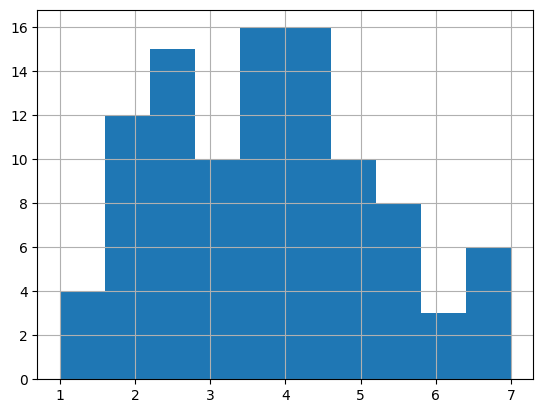

In [9]:
df['M1'].hist()
plt.show()


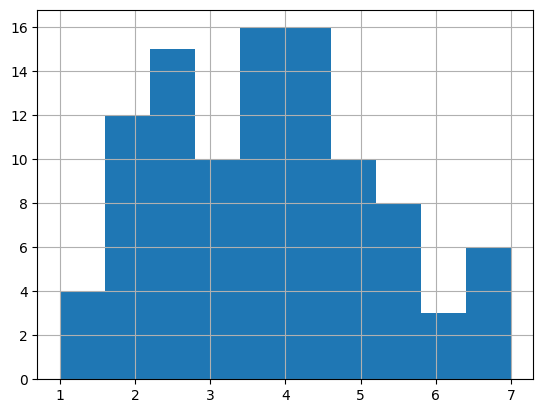

In [10]:
df['M1'].hist(bins=10)
plt.show()

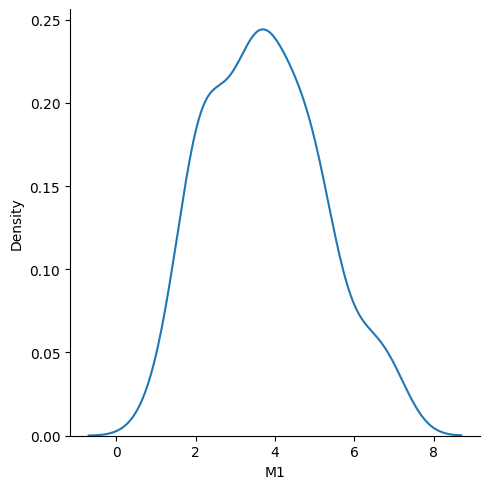

In [11]:
sns.displot(df, x='M1', kind='kde')
plt.show()

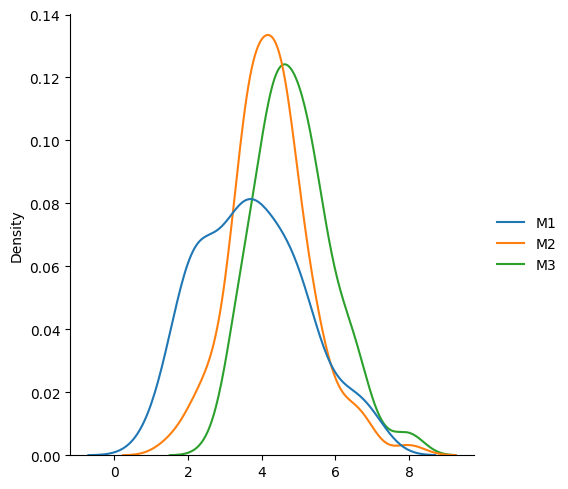

In [12]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

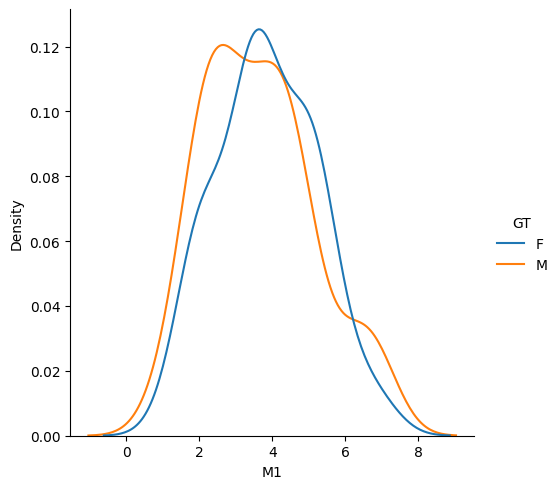

In [13]:
sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()

# Skewness (Độ lệch) và Kurtosis (Độ nhọn) là gì?
Skewness và kurtosis là hai thước đo thống kê quan trọng để mô tả hình dạng của phân phối dữ liệu.

### 1. Skewness (Độ lệch)
* Skewness đo lường mức độ bất đối xứng của phân phối dữ liệu xung quanh giá trị trung bình.
* Nếu phân phối của dữ liệu đối xứng hoàn toàn (giống như phân phối chuẩn), skewness sẽ bằng 0.
* Các loại skewness:
  * Skewness = 0: Phân phối đối xứng hoàn toàn (như phân phối chuẩn).
  * Skewness > 0 (Positive skewness): Phân phối lệch phải (right-skewed). Đuôi của phân phối kéo dài hơn về phía bên phải. Trong trường hợp này, phần lớn dữ liệu nằm về phía bên trái của trung bình, với một vài giá trị lớn kéo dài về phía bên phải. Trung bình lớn hơn trung vị
  * Skewness < 0 (Negative skewness): Phân phối lệch trái (left-skewed). Đuôi của phân phối kéo dài hơn về phía bên trái. Trong trường hợp này, phần lớn dữ liệu nằm về phía bên phải của trung bình, với một vài giá trị nhỏ kéo dài về phía bên trái. Trung bình nhỏ hơn trung vị

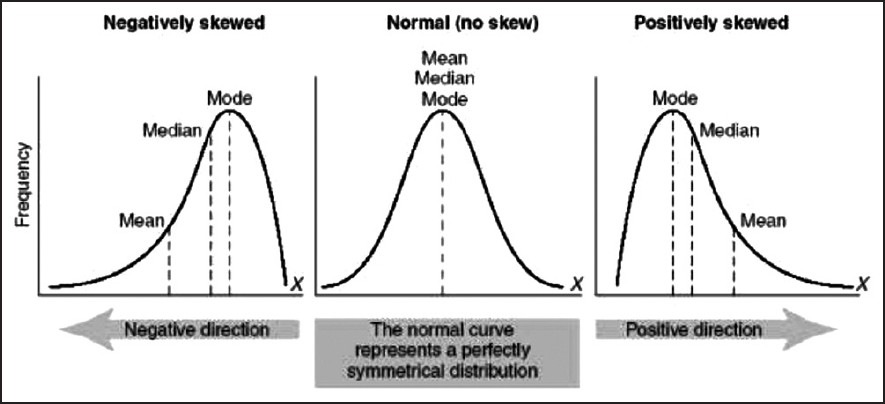

* Ý nghĩa của skewness:
  * Skewness giúp hiểu liệu dữ liệu có phân bố đồng đều xung quanh giá trị trung bình hay không.
  * Dữ liệu có skewness dương có thể cho thấy giá trị trung bình bị kéo lên bởi một số giá trị lớn (cực đoan), trong khi skewness âm cho thấy giá trị trung bình bị kéo xuống bởi một số giá trị nhỏ (cực đoan).

### 2. Kurtosis (Độ nhọn)
* Kurtosis đo lường "độ nhọn" hoặc "độ dẹt" của phân phối dữ liệu so với phân phối chuẩn.
* Các loại kurtosis:
  * Excess kurtosis = 0: Đây là phân phối chuẩn (normal distribution). Phân phối này có đỉnh và đuôi tiêu chuẩn mà không có giá trị cực đoan đặc biệt.
  * Excess kurtosis > 0: Phân phối này có đỉnh nhọn hơn và đuôi dài hơn, điều này cho thấy có nhiều giá trị cực đoan hơn so với phân phối chuẩn (leptokurtic).
  * Excess kurtosis < 0: Phân phối này có đỉnh phẳng hơn và đuôi ngắn hơn, có ít giá trị cực đoan hơn so với phân phối chuẩn (platykurtic).

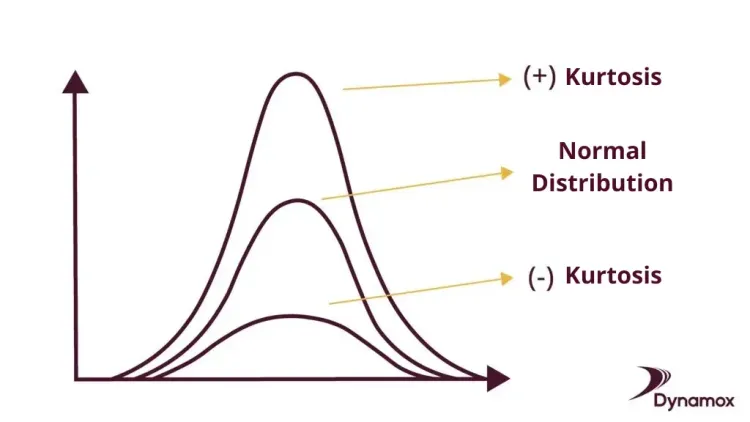

* Ý nghĩa:
  * Kurtosis giúp hiểu rõ hơn về đặc tính phân bố của dữ liệu, đặc biệt là sự xuất hiện của các giá trị ngoại lai (outliers).
  * Kurtosis cao (leptokurtic) cho thấy phân phối có nhiều giá trị ngoại lai hơn và phân phối dữ liệu tập trung nhiều xung quanh trung bình. Ngược lại, kurtosis thấp (platykurtic) cho thấy phân phối có ít giá trị ngoại lai hơn và dữ liệu phân tán đều hơn.

In [14]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [15]:
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

# Biểu đồ Boxplot là gì?
Biểu đồ hộp (boxplot) là một công cụ trực quan hóa dữ liệu thống kê dùng để thể hiện sự phân bố của một tập dữ liệu. Nó cho phép dễ dàng nhận biết các đặc tính quan trọng như trung vị, phần tư đầu (Q1), phần tư thứ ba (Q3), khoảng cách giữa các phần tư (IQR), và các giá trị ngoại lai (outliers).


# Các loại giá trị ngoại lai:
### Nghi ngờ bất thường (Mild outliers):
* Mild outliers là những giá trị nằm ngoài khoảng từ Q1 - 1.5 * IQR đến Q3 + 1.5 * IQR nhưng vẫn nằm trong khoảng từ Q1 - 3 IQR đến Q3 + 3 * IQR.
* Công thức xác định:
  * x < Lower Bound = Q1 - 1.5 * IQR
  * x > Upper Bound = Q3 + 1.5 * IQR
* Ý nghĩa:
  * Những giá trị này được coi là ngoại lai nhẹ (mild outliers) vì chúng nằm ngoài phạm vi của phần lớn dữ liệu nhưng không quá xa.
  * Các giá trị này không phải là cực đoan và có thể xảy ra do sự biến đổi tự nhiên của dữ liệu. Ví dụ, nếu bạn đo chiều cao của một nhóm người, một vài người cao hơn hoặc thấp hơn nhiều so với đa số nhưng không quá khác biệt thì có thể là mild outliers.
  * Những giá trị này thường không bị loại bỏ ngay lập tức trong phân tích dữ liệu vì chúng vẫn có thể mang thông tin quan trọng.
### Bất thường mạnh (Severe outliers):
* Severe outliers là những giá trị nằm ngoài khoảng từ Q1 - 3 * IQR trở xuống hoặc Q3 + 3 * IQR trở lên.
* Công thức xác định:
  * x < Q1 - 3 * IQR
  * x > Q3 + 3 * IQR
* Ý nghĩa:
  * Những giá trị này được coi là ngoại lai mạnh (severe outliers) vì chúng nằm rất xa khỏi phạm vi của phần lớn dữ liệu.
  * Các giá trị này thường là cực đoan và có thể cho thấy dữ liệu bị lỗi hoặc có sự cố khi thu thập dữ liệu (ví dụ, nhập liệu sai). Chúng có thể ảnh hưởng mạnh đến các phân tích thống kê hoặc mô hình học máy.
  * Trong nhiều trường hợp, severe outliers có thể bị loại bỏ hoặc điều tra kỹ lưỡng hơn để xem chúng có hợp lý hay không.


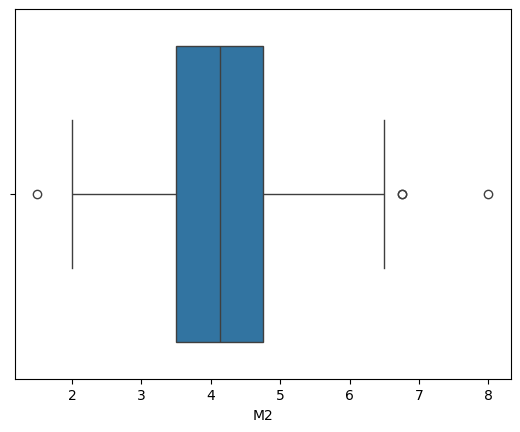

In [16]:
sns.boxplot(data=df['M2'], orient="h")
plt.show()

In [17]:
Q1 = df['M2'].quantile(0.25)
Q3 = df['M2'].quantile(0.75)

IQR = Q3 - Q1
LowerBound = Q1 - IQR * 1.5
UpperBound = Q3 + IQR * 1.5
LowerFence = Q1 - IQR * 3
UpperFence = Q3 + IQR * 3

print(f"Khoảng tứ phân vị: {IQR}")
print(f"Lower Bound: {LowerBound}, Upper Bound = {UpperBound}")
print(f"Lower Fence: {LowerFence}, Upper Fence = {UpperFence}")

print("\n\nCác điểm nghi ngờ bất thường là")
df[((df['M2'] < LowerBound) & (df['M2'] > LowerFence)) | ((df['M2'] > UpperBound) & (df['M2'] < UpperFence))]

Khoảng tứ phân vị: 1.25
Lower Bound: 1.625, Upper Bound = 6.625
Lower Fence: -0.25, Upper Fence = 8.5


Các điểm nghi ngờ bất thường là


,MSSV,GT,DT,KV,M1,M2,M3,TBM,XL,KT,NGAYTHI,DINHHUONGNGHENGHIEP,NHOM,PLUS
2,SV003,M,KINH,1,5.00,6.75,4.00,5.250000,FAIR,C,12/7/2018,No,G3,0.0
6,SV007,F,KINH,2,6.50,6.75,5.25,6.166667,FAIR,C,12/7/2018,Yes,G3,0.0
95,SV0096,F,KINH,1,5.25,1.50,6.25,4.333333,FAIL,C,7/20/2022,Yes,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,6.333333,FAIR,C,7/20/2022,Yes,G3,0.0


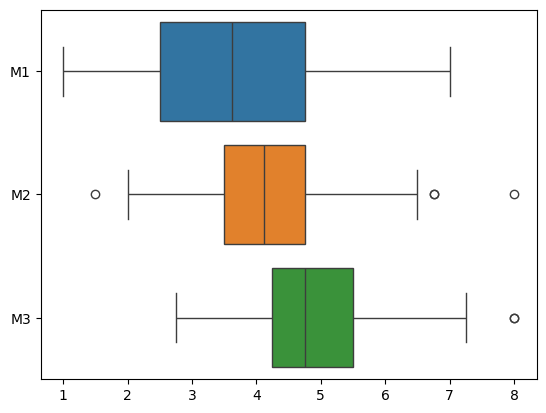

In [18]:
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

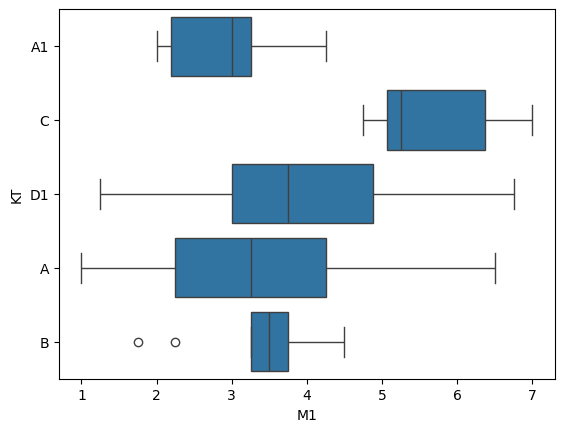

In [19]:
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

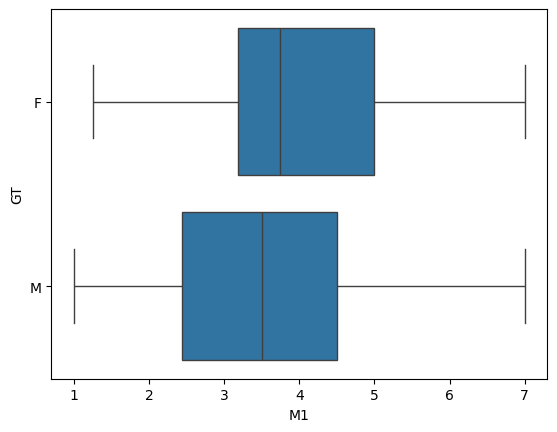

In [20]:
sns.boxplot(x='M1', y='GT',data=df, orient='h')
plt.show()

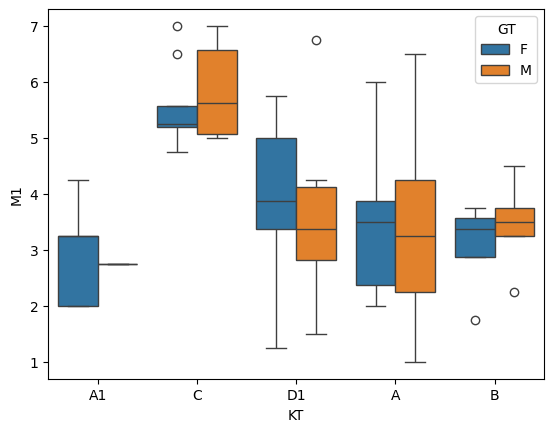

In [21]:
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

# Biểu đồ Q-Q (Quantile-Quantile Plot)
cung cấp thông tin về mức độ phù hợp của dữ liệu với một phân phối lý thuyết, thường là phân phối chuẩn. Nó giúp bạn đánh giá xem dữ liệu của bạn có tuân theo phân phối chuẩn hay không. 
# Kiểm Tra Tính Chuẩn của Dữ Liệu:
* Nếu các điểm dữ liệu trên biểu đồ Q-Q nằm gần hoặc trên một đường thẳng, điều đó cho thấy dữ liệu của bạn gần như tuân theo phân phối chuẩn.
* Nếu các điểm lệch xa khỏi đường thẳng, điều đó cho thấy dữ liệu không tuân theo phân phối chuẩn và có thể có các đặc điểm như lệch (skewness) hoặc đuôi dài (heavy tails).

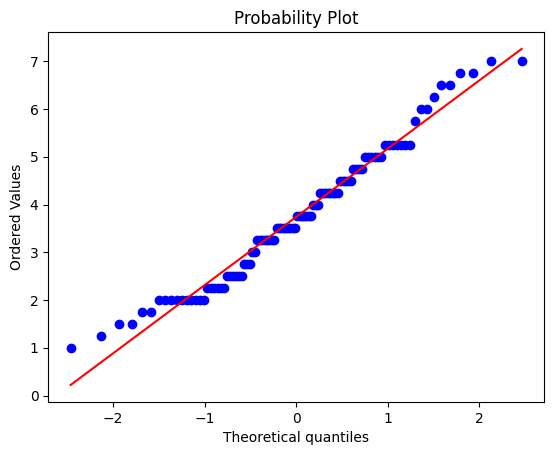

In [22]:
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

# Hiệp phương sai (Covariance) là gì?
Hiệp phương sai đo lường mức độ mà hai biến thay đổi cùng nhau. Nó cho biết liệu một sự gia tăng trong một biến có dẫn đến sự gia tăng hoặc giảm trong biến kia hay không.

# Giải thích chi tiết:
### Covariance (cov):
* Cov > 0: Hai biến có mối quan hệ đồng biến (cùng chiều). Nếu một biến tăng, biến kia cũng có xu hướng tăng.
* Cov < 0: Hai biến có mối quan hệ nghịch biến (ngược chiều). Nếu một biến tăng, biến kia có xu hướng giảm.
* Cov = 0: Hai biến không có tương quan tuyến tính rõ ràng. Tuy nhiên, điều này không có nghĩa là chúng hoàn toàn không có mối quan hệ nào; chỉ đơn giản là không có mối quan hệ tuyến tính.
### Mức độ chặt chẽ của mối quan hệ:
* Covariance càng lớn (theo giá trị tuyệt đối) chỉ cho biết rằng hai biến có xu hướng thay đổi mạnh mẽ cùng nhau (dù là cùng chiều hay ngược chiều), nhưng không nói lên được mức độ chặt chẽ hay ý nghĩa thống kê của mối quan hệ.
* Covariance không chuẩn hóa, vì vậy giá trị của nó phụ thuộc vào đơn vị của các biến. Điều này làm cho việc so sánh mức độ chặt chẽ của mối quan hệ giữa các cặp biến khác nhau (có thể có đơn vị khác nhau) trở nên khó khăn.


In [23]:
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


cov(M1, M2) = 0.053081: Giá trị này lớn hơn 0, chỉ ra rằng có một mối quan hệ đồng biến (cùng chiều) giữa M1 và M2. Điều này có nghĩa là khi M1 tăng, M2 có xu hướng tăng, và ngược lại.
Mức độ của mối quan hệ: Tuy nhiên, giá trị 0.053081 khá nhỏ, điều này có nghĩa là mối quan hệ này rất yếu.

# Hệ số tương quan (Correlation) là gì?
Hệ số tương quan đo lường mức độ mạnh mẽ và hướng của mối quan hệ tuyến tính giữa hai biến. Nó cho biết mức độ mà một sự gia tăng (hoặc giảm) trong một biến có xu hướng dẫn đến sự gia tăng (hoặc giảm) tương ứng trong biến kia.

# Giải thích chi tiết:
### Correlation (corr):
* Corr > 0: Hai biến có mối quan hệ đồng biến (cùng chiều). Nếu một biến tăng, biến kia cũng có xu hướng tăng.
* Corr < 0: Hai biến có mối quan hệ nghịch biến (ngược chiều). Nếu một biến tăng, biến kia có xu hướng giảm.
* Corr = 0: Hai biến không có tương quan tuyến tính rõ ràng. Tuy nhiên, điều này không có nghĩa là chúng hoàn toàn không có mối quan hệ nào; chỉ đơn giản là không có mối quan hệ tuyến tính.
### Mức độ chặt chẽ của mối quan hệ:
* Correlation có giá trị nằm trong khoảng từ -1 đến 1, và là thước đo chuẩn hóa, do đó nó không bị ảnh hưởng bởi đơn vị của các biến:
  * Corr = 1: Mối quan hệ tuyến tính hoàn hảo cùng chiều giữa hai biến.
  * Corr = -1: Mối quan hệ tuyến tính hoàn hảo ngược chiều giữa hai biến.
  * Corr gần 0: Không có mối quan hệ tuyến tính giữa hai biến.
  * |Corr| < 0.5: tương quan thấp
  * |Corr| > 0.5: tương quan cao
* Giá trị tuyệt đối của Correlation càng gần 1: Mối quan hệ tuyến tính giữa hai biến càng chặt chẽ. Giá trị càng gần 0, mối quan hệ tuyến tính càng yếu.
* Correlation cho phép so sánh mức độ mạnh mẽ của mối quan hệ giữa các cặp biến khác nhau bất kể đơn vị đo lường, làm cho nó dễ dàng sử dụng để đánh giá mối quan hệ trong các tập dữ liệu khác nhau.


In [24]:
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


corr(M1,M2) = 0.035 > 0 có nghĩa là tương quan thuận. tuy nhiên giá trị này nhỏ hơn 0.5 nghĩa là tương quan mức độ thấp

### Biểu đồ hồi quy tuyến tính - Linear Model Plot
lmplot là một hàm trong thư viện Seaborn của Python, được sử dụng để tạo biểu đồ hồi quy tuyến tính (Linear Regression Plot). Biểu đồ này giúp trực quan hóa mối quan hệ tuyến tính giữa hai biến số trong dữ liệu và đồng thời vẽ đường hồi quy tuyến tính (line of best fit) cho các điểm dữ liệu.

## Các thành phần chính của lmplot:
### Biến đầu vào (X, Y):
* x và y là hai biến số trong dữ liệu mà bạn muốn so sánh và vẽ đường hồi quy tuyến tính.
* Biến x thường nằm trên trục hoành (trục X), và biến y nằm trên trục tung (trục Y).
### Mức độ phân tán (Scatter Plot):
* Biểu đồ lmplot cũng bao gồm các điểm phân tán (scatter plot) để thể hiện từng quan sát trong tập dữ liệu, giúp dễ dàng nhận thấy mối tương quan giữa hai biến.
## Ý nghĩa và ứng dụng của lmplot:
* Kiểm tra mối quan hệ tuyến tính: lmplot cho phép bạn kiểm tra mối quan hệ tuyến tính giữa hai biến số. Bạn có thể dễ dàng thấy mối quan hệ này trên biểu đồ và nhận biết xem nó có mạnh mẽ (đường hồi quy rõ ràng, các điểm gần nhau) hay yếu (các điểm phân tán không tập trung quanh đường).

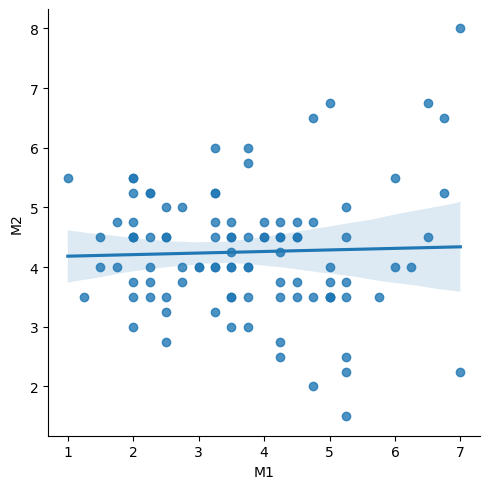

In [25]:
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

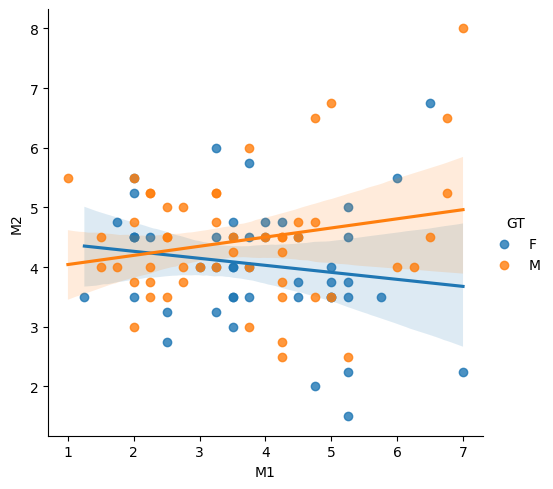

In [26]:
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

## heatmap
* Biểu diễn độ tương quan
## pairplot
* Trên đường chéo (ví dụ: M1 với M1): Hiển thị biểu đồ KDE (nếu diag_kind='kde') để hiển thị phân phối của từng biến.
* Ngoài đường chéo (ví dụ: M1 với M2, M1 với M3): Hiển thị biểu đồ hồi quy tuyến tính (nếu kind='reg') để biểu diễn mối quan hệ tuyến tính giữa các cặp biến khác nhau.

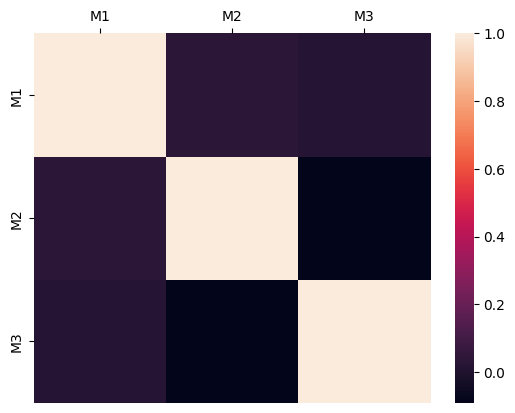

In [27]:
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

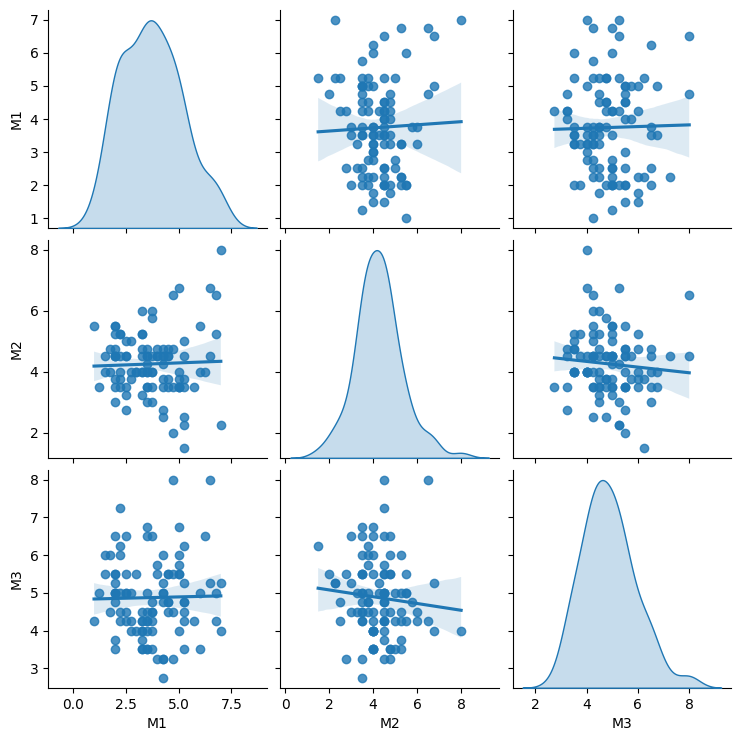

In [28]:
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()